In [513]:
import sys
import os

script_path = os.path.abspath('')
current_file_dir = os.path.dirname(script_path)
sys.path.insert(0, f"{current_file_dir}/FinRL/")

import logging
import pandas as pd
import numpy as np
import datetime
import torch
import yfinance as yf

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl import config_tickers
from finrl.config import INDICATORS

#from finrl.meta.preprocessor.preprocessors import GroupByScaler
from finrl.meta.env_portfolio_optimization.env_portfolio_optimization import PortfolioOptimizationEnv
from finrl.agents.portfolio_optimization.models import DRLAgent
from finrl.agents.portfolio_optimization.architectures import EIIE

import src.neel_env as env 

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [479]:
def load_data() -> pd.DataFrame:
    # download data
    stocks = env.STOCKS
    script_path = os.path.abspath('')
    current_file_dir = os.path.dirname(script_path)
    data_path = os.path.join(
           current_file_dir, 
           "src",
           "data", 
           f"{env.TIME_RANGE_START}-{env.TIME_RANGE_START}-{'-'.join(env.STOCKS)}.pkl"
    )
    if not os.path.isfile(data_path): 
       df = YahooDownloader(
               start_date = env.TIME_RANGE_START,
               end_date = env.TIME_RANGE_END,
               ticker_list = env.STOCKS,
            ).fetch_data()
       df.to_pickle(data_path)
    else:
       df = pd.read_pickle(data_path)
    return df


In [265]:
df = load_data()

# preprocess data, calculate set of technical indicators on the data
fe = FeatureEngineer(
       use_technical_indicator=True,
       tech_indicator_list = env.INDICATORS
    )

df_t = fe.preprocess_data(df)
fmt = "%Y-%m-%d"
train_df = data_split(df, env.TRAIN_START.strftime(fmt), env.TRAIN_END.strftime(fmt))
test_df = data_split(df, env.TEST_START.strftime(fmt), env.TEST_END.strftime(fmt))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

KeyboardInterrupt: 

### Load in graph and temporal data to enhance feature space

In [203]:
!curl -L -O https://github.com/C4i0kun/Temporal_Relational_Stock_Ranking_FinRL/archive/refs/heads/main.zip
# note: manually unzip f

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 77.4M    0 77.4M    0     0  7096k      0 --:--:--  0:00:11 --:--:-- 10.1M^C


In [514]:
#nyse_temporal  = pd.read_csv("/Users/neel/PycharmProjects/cs234-final-project/src/Temporal_Relational_Stock_Ranking_FinRL-main/temporal_data/temporal_data_processed/NYSE_temporal_data.csv")
nasdaq_temporal = pd.read_csv("/Users/neel/PycharmProjects/cs234-final-project/src/Temporal_Relational_Stock_Ranking_FinRL-main/temporal_data/temporal_data_processed/NASDAQ_temporal_data.csv")


In [515]:
nasdaq_temporal

,day,open,high,low,close,volume,tic
0,0,0.270533,0.269522,0.267237,0.263333,0.275333,AABA
1,0,0.238730,0.237522,0.239888,0.240502,0.248031,AAON
2,0,0.424556,0.424768,0.429769,0.442628,0.445018,AAPL
3,0,0.650667,0.648412,0.634492,0.631473,0.667839,AAWW
4,0,0.766565,0.761693,0.759330,0.750061,0.788157,AAXJ
...,...,...,...,...,...,...,...
1277365,1244,0.909992,0.918809,0.912345,0.922698,0.913021,ZBRA
1277366,1244,0.660990,0.648907,0.636086,0.630816,0.665167,ZEUS
1277367,1244,0.981600,0.961674,0.926768,0.914257,0.984345,ZION
1277368,1244,0.980227,0.974903,0.960225,0.964956,0.997580,ZIV


In [516]:

nasdaq_edge_index = np.load("Temporal_Relational_Stock_Ranking_FinRL-main/relational_data/edge_indexes/NASDAQ_sector_industry_edge_index.npy")
nyse_edge_index  = np.load
nasdaq_edge_index

array([[   0,   15,    0, ..., 1021, 1014, 1024],
       [  15,    0,   18, ..., 1011, 1024, 1014]])

In [517]:

nasdaq_edge_type = np.load("Temporal_Relational_Stock_Ranking_FinRL-main/relational_data/edge_types/NASDAQ_sector_industry_edge_type.npy")
nasdaq_edge_type

array([ 0,  0,  0, ...,  1, 26, 26])

In [518]:
list_of_stocks = nasdaq_temporal["tic"].unique().tolist()
tics_in_portfolio = ['AAPL', 'AAXJ', 'ACWX', 'ADBE', 'AMCX', 'AMTD', 'ARCC', 'BANF', 'BIB', 'BLMT', 'BOKF', 'CBSH', 'CMCSA', 'CRED', 'CSCO', 'CSFL', 'CTBI', 'CTXS', 'DGII', 'DGLD', 'DIOD', 'DISCK', 'DISH', 'DSPG', 'EMCB', 'EMIF', 'EPAY', 'EWZS', 'FB', 'MSFT', 'INTC', 'NVDA', 'GOOGL', 'PLAB', 'QQQ', 'GULF', 'PLW']#['AAPL', 'AAXJ', 'ACWX', 'ADBE', 'AMCX', 'AMTD', 'ARCC', 'BANF', 'BIB', 'BLMT', 'BOKF', 'CBSH', 'CMCSA', 'CRED', 'CSCO', 'CSFL', 'CTBI', 'CTXS', 'DGII', 'DGLD', 'DIOD', 'DISCK', 'DISH', 'DSPG', 'EMCB', 'EMIF', 'EPAY', 'EWZS', 'FB', 'FBNC', 'FCBC', 'FFIN', 'FFKT', 'FIBK', 'FITB', 'FNLC', 'FOXA', 'FSLR', 'FTRI', 'GBCI', 'GOOGL', 'GSBC', 'HAFC', 'HBAN', 'HMST', 'HOPE', 'HRZN', 'HSTM', 'IBB', 'IGOV', 'INTC', 'INTL', 'INTU', 'IPGP', 'ISHG', 'IUSG', 'JKI', 'KLIC', 'MCHI', 'MDIV', 'MOFG', 'MSCC', 'MSFT', 'MU', 'MXIM', 'NBTB', 'NICE', 'NVDA', 'OZRK', 'PFLT', 'PGJ', 'PIE', 'PLAB', 'PLW', 'PPH', 'PSL', 'QADA', 'QLYS', 'QQQ', 'PIZ', 'PLW', 'PNQI', 'PSTB', 'PTF', 'QABA', 'QLYS', 'SNPS', 'SPWR', 'SQQQ', 'SWKS', 'TCBK', 'TUR', 'TXN', 'VIAB', 'VMBS', 'VONE', 'VONV', 'VTIP', 'WHF', 'WTBA', 'WTFC', 'ACWI', 'AMCX', 'ARCC', 'AROW', 'BLKB', 'BPOP', 'BPOPN', 'CATY', 'CBF', 'CBOE', 'CCNE', 'CGO', 'CHCO', 'CHKP', 'CME', 'CRUS', 'CSCO', 'CSOD', 'DGII', 'DISCK', 'DSGX', 'DSLV', 'DSPG', 'DVY', 'EMIF', 'FCBC', 'FFIC', 'FFIN', 'FNLC', 'FSLR', 'FTCS', 'FTRI', 'FUNC', 'GAIN', 'GULF', 'HAFC', 'HBAN', 'HBHC', 'HRZN', 'IBOC', 'IEF', 'IEI', 'IFEU', 'INTC', 'INTL', 'IPGP']
#tics_in_portfolio = ["AAPL", "CMCSA", "CSCO", "FB", "HBAN", "INTC", "MSFT", "MU", "NVDA", "QQQ", "XIV"]

portfolio_nodes = []
for tic in tics_in_portfolio:
    portfolio_nodes.append(list_of_stocks.index(tic))
portfolio_nodes
print(len(portfolio_nodes))


37


In [519]:
from torch_geometric.utils import k_hop_subgraph
nodes_kept, new_edge_index, nodes_to_select, edge_mask = k_hop_subgraph(
    torch.LongTensor(portfolio_nodes),
    2,
    torch.from_numpy(nasdaq_edge_index),
    relabel_nodes=True,
)
print(len(nodes_to_select))

37


In [520]:
# reduce temporal data
nodes_kept = nodes_kept.tolist()
nasdaq_temporal["tic_id"], _ = pd.factorize(nasdaq_temporal["tic"], sort=True)
nasdaq_temporal = nasdaq_temporal[nasdaq_temporal["tic_id"].isin(nodes_kept)]
nasdaq_temporal = nasdaq_temporal.drop(columns="tic_id")
nasdaq_temporal

,day,open,high,low,close,volume,tic
2,0,0.424556,0.424768,0.429769,0.442628,0.445018,AAPL
4,0,0.766565,0.761693,0.759330,0.750061,0.788157,AAXJ
7,0,0.244700,0.244212,0.238217,0.231041,0.251322,ABCB
8,0,0.689403,0.698864,0.695715,0.675068,0.708124,ABCO
13,0,0.566419,0.564621,0.563147,0.560503,0.579132,ACIW
...,...,...,...,...,...,...,...
1277358,1244,0.923544,0.922537,0.896003,0.888519,0.966042,XIV
1277359,1244,0.919490,0.931946,0.950966,0.960872,0.920000,XLNX
1277361,1244,0.736906,0.747264,0.744030,0.745198,0.743781,YNDX
1277367,1244,0.981600,0.961674,0.926768,0.914257,0.984345,ZION


In [521]:
# reduce edge type
new_edge_type = torch.from_numpy(nasdaq_edge_type)[edge_mask]
_, new_edge_type = torch.unique(new_edge_type, return_inverse=True)
new_edge_type

tensor([0, 0, 0,  ..., 2, 6, 6])

In [522]:
df_portfolio = nasdaq_temporal[["day", "tic", "close", "high", "low"]]

df_portfolio_train = df_portfolio[df_portfolio["day"] < 979]
df_portfolio_test = df_portfolio[df_portfolio["day"] >= 979]

environment_train = PortfolioOptimizationEnv(
        df_portfolio_train,
        initial_amount=100000,
        comission_fee_pct=0,
        time_window=50,
        features=["close", "high", "low"],
        time_column="day",
        normalize_df=None, # dataframe is already normalized
        tics_in_portfolio=tics_in_portfolio
    )

environment_test = PortfolioOptimizationEnv(
        df_portfolio_test,
        initial_amount=100000,
        comission_fee_pct=0,
        time_window=50,
        features=["close", "high", "low"],
        time_column="day",
        normalize_df=None, # dataframe is already normalized
        tics_in_portfolio=tics_in_portfolio
    )

In [525]:
from finrl.agents.portfolio_optimization.architectures import GPM
# set PolicyGradient parameters
model_kwargs = {
    "lr": 0.01,
    "policy": GPM,
    
}

# here, we can set GPM's parameters
policy_kwargs = {
    "edge_index": new_edge_index,
    "edge_type": new_edge_type,
    "nodes_to_select": nodes_to_select,
    "softmax_temperature": 20
}

model = DRLAgent(environment_train).get_model("pg", device, model_kwargs, policy_kwargs)

In [526]:
DRLAgent.train_model(model, episodes=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Initial portfolio value:100000
Final portfolio value: 144503.265625
Final accumulative portfolio value: 1.44503265625
Maximum DrawDown: -0.1194631789959999
Sharpe ratio: 4.8491817158027395


 20%|██        | 1/5 [06:27<25:48, 387.16s/it]

Initial portfolio value:100000
Final portfolio value: 229354.859375
Final accumulative portfolio value: 2.29354859375
Maximum DrawDown: -0.04656043217650174
Sharpe ratio: 9.670906354508524


 40%|████      | 2/5 [12:55<19:23, 387.80s/it]

Initial portfolio value:100000
Final portfolio value: 374717.25
Final accumulative portfolio value: 3.7471725
Maximum DrawDown: -0.09188696748988157
Sharpe ratio: 8.031455538866203


 60%|██████    | 3/5 [19:23<12:55, 387.77s/it]

Initial portfolio value:100000
Final portfolio value: 443774.03125
Final accumulative portfolio value: 4.4377403125
Maximum DrawDown: -0.14000468749999995
Sharpe ratio: 6.795011880280746


 80%|████████  | 4/5 [36:28<10:39, 639.32s/it]

Initial portfolio value:100000
Final portfolio value: 448609.625
Final accumulative portfolio value: 4.48609625
Maximum DrawDown: -0.14185929687499998
Sharpe ratio: 6.797400855336994


100%|██████████| 5/5 [42:57<00:00, 515.46s/it]


In [527]:
torch.save(model.train_policy.state_dict(), "Neel_GPM_t=20.pt")

In [528]:
GPM_results = {
    "train": environment_train._asset_memory["final"],
    "test": {},
}

# instantiate an architecture with the same arguments used in training
# and load with load_state_dict.
policy = GPM(new_edge_index, new_edge_type, nodes_to_select, device=device)
policy.load_state_dict(torch.load("Neel_GPM_t=20.pt"))

# testing
DRLAgent.DRL_validation(model, environment_test, policy=policy)
GPM_results["test"] = environment_test._asset_memory["final"]
GPM_results["weights"] = environment_test._actions_memory

Initial portfolio value:100000
Final portfolio value: 156010.75
Final accumulative portfolio value: 1.5601075
Maximum DrawDown: -0.001841107308792389
Sharpe ratio: 26.56910099227229


In [529]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [530]:
UBAH_results = {
    "train": {},
    "test": {},
}

PORTFOLIO_SIZE = len(tics_in_portfolio)

# train period
terminated = False
environment_train.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_train.step(action)
UBAH_results["train"] = environment_train._asset_memory["final"]

# test period
terminated = False
environment_test.reset() 
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_test.step(action)
UBAH_results["test"] = environment_test._asset_memory["final"]

Initial portfolio value:100000
Final portfolio value: 139439.296875
Final accumulative portfolio value: 1.39439296875
Maximum DrawDown: -0.1267971726989383
Sharpe ratio: 4.2476339763087605
Initial portfolio value:100000
Final portfolio value: 112248.5234375
Final accumulative portfolio value: 1.122485234375
Maximum DrawDown: -0.011877556847480375
Sharpe ratio: 11.488861906546916


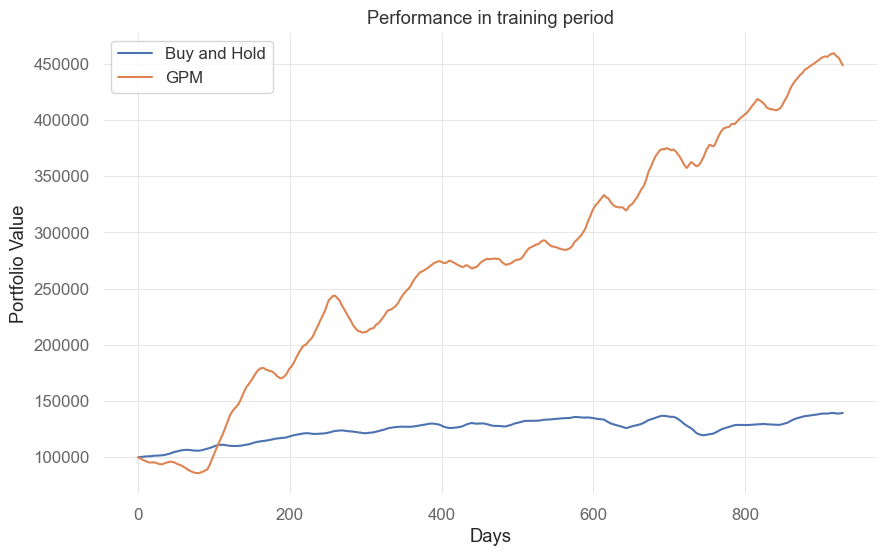

In [531]:
plt.plot(UBAH_results["train"], label="Buy and Hold")
plt.plot(GPM_results["train"], label="GPM")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in training period")
plt.legend()

plt.show()

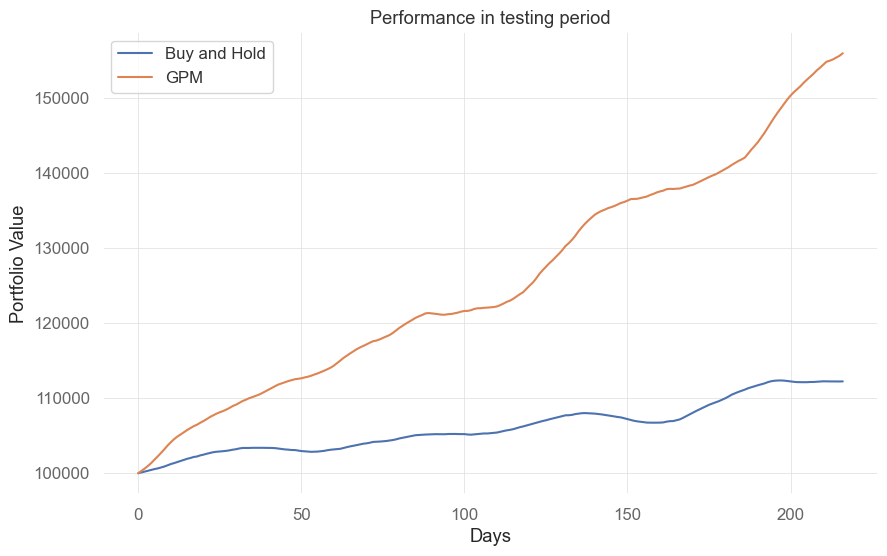

In [533]:
plt.plot(UBAH_results["test"], label="Buy and Hold")
plt.plot(GPM_results["test"], label="GPM")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in testing period")
plt.legend()

plt.show()

In [534]:
print(GPM_results["test"])

[100000, 100311.21969223022, 100630.1, 100979.48, 101366.7, 101820.945, 102253.53, 102716.76, 103191.625, 103695.945, 104140.62, 104546.99, 104892.09, 105168.56, 105469.625, 105764.94, 106015.77, 106278.24, 106471.484, 106727.62, 106964.76, 107222.82, 107501.195, 107725.82, 107949.7, 108131.02, 108292.305, 108491.29, 108715.02, 108967.18, 109148.49, 109389.9, 109630.27, 109803.34, 110011.164, 110154.19, 110320.484, 110484.86, 110691.8, 110927.76, 111168.43, 111388.63, 111623.414, 111838.17, 111991.945, 112147.77, 112291.086, 112415.26, 112532.65, 112590.68, 112661.24, 112775.24, 112870.25, 113003.55, 113166.6, 113312.57, 113491.67, 113676.52, 113870.8, 114084.81, 114359.95, 114698.58, 115042.94, 115399.53, 115701.48, 115988.836, 116276.336, 116548.82, 116777.7, 116975.95, 117188.34, 117406.78, 117607.836, 117691.65, 117847.48, 118032.33, 118232.35, 118421.03, 118692.484, 119024.484, 119366.195, 119660.195, 119941.96, 120190.29, 120453.49, 120720.38, 120917.31, 121095.086, 121313.67, 12

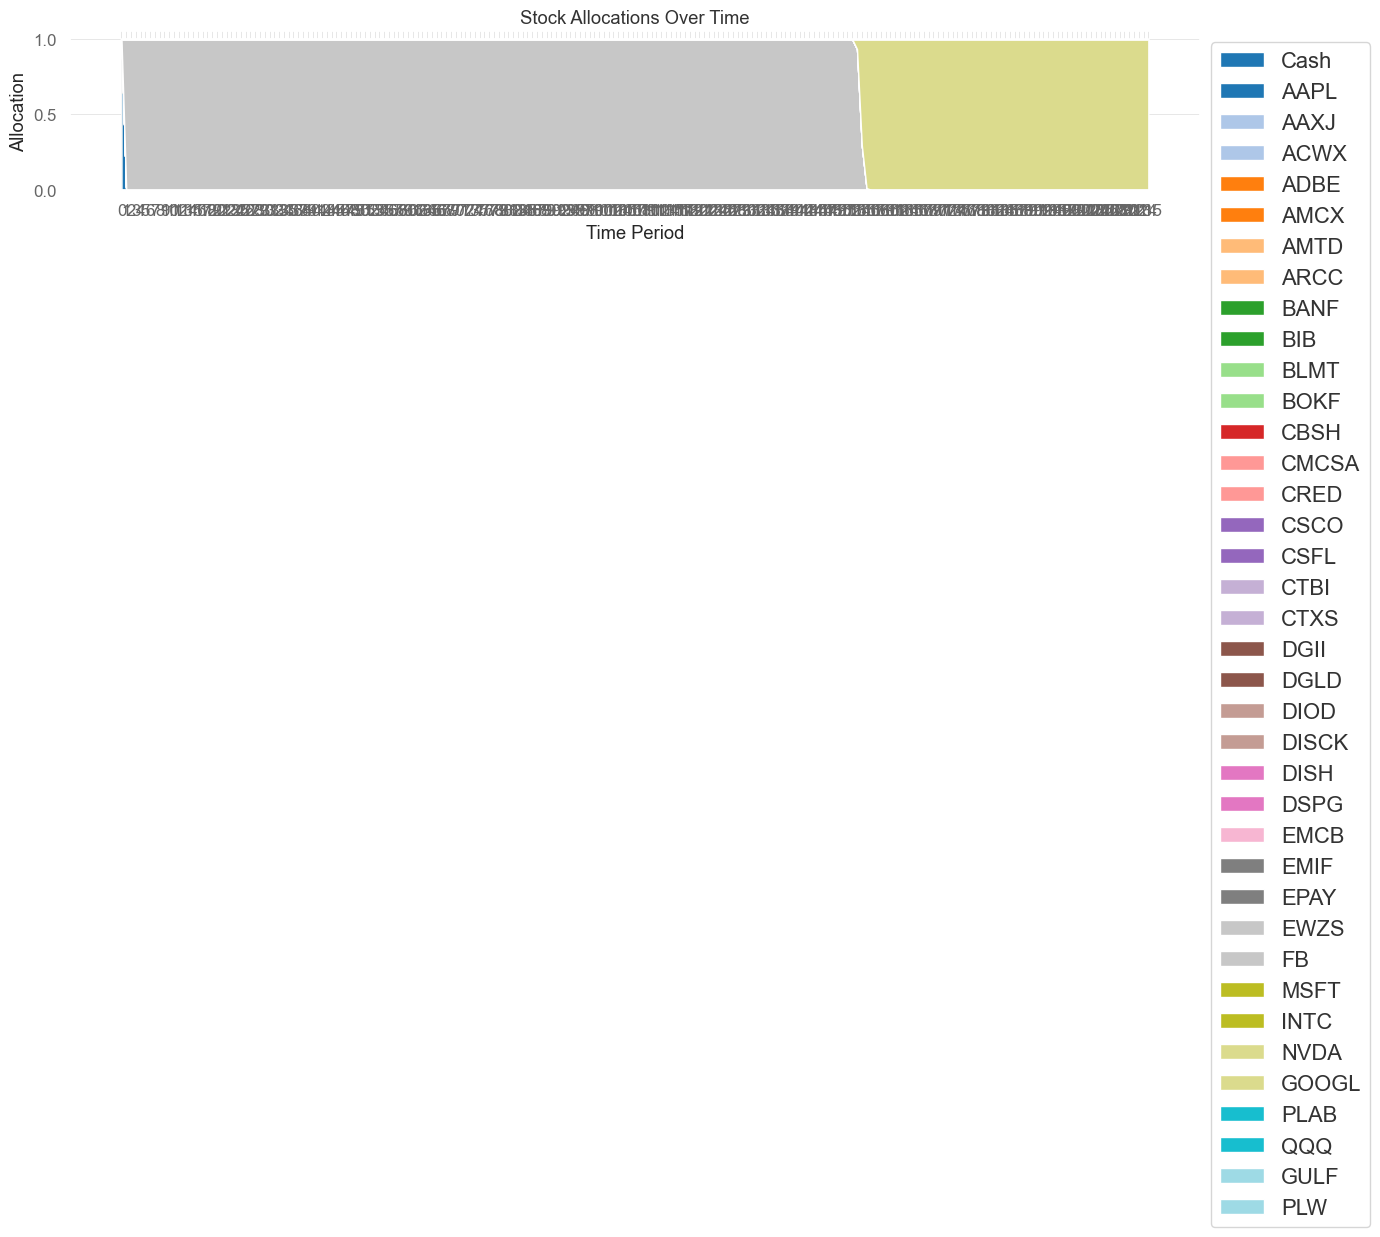

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 3.44719422223905e-43, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.7376100957627732e-43, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0930128021733573e-43, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 7.42688186

In [536]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: list of weight vectors
weights = GPM_results["weights"]
weights = [l.tolist() for l in weights]

# Convert the list of lists into a numpy array for easier manipulation
weights_array = np.array(weights)

# Preprocess the data to concatenate periods with the same allocations
concatenated_weights = [weights[0]]
time_labels = ['Period 0']
start_period = 0

for i in range(1, len(weights)):
    if weights[i] != weights[i-1]:
        concatenated_weights.append(weights[i])
        time_labels.append(f'Periods {start_period}-{i-1}')
        start_period = i

# Add the last period
time_labels.append(f'Periods {start_period}-{len(weights)-1}')

# Convert the concatenated weights list to a numpy array
concatenated_weights_array = np.array(concatenated_weights)

# Number of time periods and stocks
num_periods, num_stocks = concatenated_weights_array.shape

# Colors for each stock
colors = plt.cm.tab20(np.linspace(0, 1, num_stocks))

# Define the mapping dictionary including cash
stock_tickers = ["Cash", 'AAPL', 'AAXJ', 'ACWX', 'ADBE', 'AMCX', 'AMTD', 'ARCC', 'BANF', 'BIB', 'BLMT', 'BOKF', 'CBSH', 'CMCSA', 'CRED', 'CSCO', 'CSFL', 'CTBI', 'CTXS', 'DGII', 'DGLD', 'DIOD', 'DISCK', 'DISH', 'DSPG', 'EMCB', 'EMIF', 'EPAY', 'EWZS', 'FB', 'MSFT', 'INTC', 'NVDA', 'GOOGL', 'PLAB', 'QQQ', 'GULF', 'PLW']
mapping = {i: stock_tickers[i] for i in range(len(stock_tickers))}

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot stacked area chart
ax.stackplot(range(num_periods), concatenated_weights_array.T, labels=[mapping[i] for i in range(num_stocks)], colors=colors)

ax.set_xlabel('Time Period')
ax.set_ylabel('Allocation')
ax.set_title('Stock Allocations Over Time')
ax.set_xticks(range(num_periods))
# ax.set_xticklabels(time_labels, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='large')

plt.tight_layout()
plt.show()
print(weights)